<div style="text-align: center;">
    <h1> <strong>Nom et Prénom : Laakel Gauzi Soumaya</strong> </h1>
    <h3><strong>Module : NATURAL LANGUAGE PROCESSING (NLP)</strong></h3>
    <h4><em>MST IASD/S1 2024-2025</em></h4>
    <hr>
    <h2><strong>EDEVOIR 1 : PRATIQUER LE SCRAPING DES SITES WEB</strong></h2>
    <p><i>Pratiquer l'extraction de données (scraping) à la fois statiques (via BeautifulSoup) et dynamiques (via Selenium), puis comparer les résultats et les combiner dans un fichier CSV final.</i></p>
</div>


# Étape 1 : Scraping du contenu statique avec BeautifulSoup

On va extraire les **titres**, **dates** et **liens** des articles depuis le site : https://fstt.ac.ma/Portail2023/

### Outils :
- `requests` : envoyer une requête HTTP.
- `BeautifulSoup` : parser et extraire le HTML.
- `csv` : enregistrer les données dans un fichier `.csv`.

### Étapes :
1. Envoyer une requête avec des en-têtes (`headers`) pour simuler un vrai navigateur.
2. Extraire les balises HTML souhaitées (`<h2>`, `<a>`, etc.).
3. Organiser les données.
4. Sauvegarder dans un fichier CSV.

### 1-1. Importation des bibliothèques

In [1]:
# On importe les bibliothèques nécessaires :
import requests  # Pour envoyer des requêtes HTTP
from bs4 import BeautifulSoup  # Pour parser le HTML
import csv  # Pour écrire les résultats dans un fichier CSV
import pandas as pd  # Pour lire et afficher les données plus facilement
from urllib.parse import urljoin  # Pour convertir les liens relatifs en liens absolus

### 1-2. Scraping statique avec BeautifulSoup

In [2]:
import requests
from bs4 import BeautifulSoup
import csv
import pandas as pd

# URL cible
url = "https://fstt.ac.ma/Portail2023/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "fr-FR,fr;q=0.9"
}

# Connexion avec gestion des erreurs
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Erreur de connexion : {e}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    articles = []

    # On tente d'extraire chaque "bloc" d'article (à adapter si besoin)
    for article in soup.find_all("article"):  # <article> est une convention HTML, modifiable si besoin
        titre = article.find("h2") or article.find("h3")  # titre possible
        date = article.find("time") or article.find("span", class_="date" )  # date possible
        lien_tag = article.find("a")  # lien

        titre_text = titre.text.strip() if titre else "Titre non trouvé"
        date_text = date.text.strip() if date else "Date non trouvée"
        lien_url = lien_tag['href'] if lien_tag and lien_tag.has_attr('href') else "Lien non trouvé"

        articles.append([titre_text, date_text, lien_url])

    # Sauvegarde CSV
    with open("articles_fstt.csv", "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Titre", "Date", "Lien"])
        writer.writerows(articles)


In [3]:
# Lecture du fichier CSV avec pandas
df_fstt = pd.read_csv("articles_fstt.csv")

# Affichage du DataFrame
print("Aperçu des articles scrappés :")
df_fstt.head()  # Affiche les 5 premières lignes

Aperçu des articles scrappés :


,Titre,Date,Lien
0,11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNAT...,Date non trouvée,https://fstt.ac.ma/Portail2023/11eme-edition-d...
1,APPEL À PARTICIPATION AU CLUB « SHABAB LABS – ...,Date non trouvée,https://fstt.ac.ma/Portail2023/appel-a-partici...
2,INVITATION : JOURNÉE DOCTORALE,Date non trouvée,https://fstt.ac.ma/Portail2023/invitation-jour...
3,FORMATION À DISTANCE EN « TÉLÉDÉTECTION RADAR ...,Date non trouvée,https://fstt.ac.ma/Portail2023/formation-a-dis...


### **L’extraction des titres et des liens fonctionne correctement, mais l’extraction des dates reste problématique. Pour résoudre ce problème de manière précise, nous allons analyser la structure HTML réelle du site afin d’identifier les balises ou classes pertinentes qui contiennent les informations de date**

In [4]:
# Après avoir généré le fichier debug_page.html
with open("debug_page.html", "r", encoding="utf-8") as f:
    print(f.read(20000))  # Affiche les 20 000 premiers caractères pour inspection

<!DOCTYPE html>
<html lang="fr-FR">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <title>
   FST – TANGER
  </title>
  <meta content="max-image-preview:large" name="robots">
   <style>
    img:is([sizes="auto" i], [sizes^="auto," i]) { contain-intrinsic-size: 3000px 1500px }
   </style>
   <link href="https://fstt.ac.ma/Portail2023/feed/" rel="alternate" title="FST » Flux" type="application/rss+xml">
    <link href="https://fstt.ac.ma/Portail2023/comments/feed/" rel="alternate" title="FST » Flux des commentaires" type="application/rss+xml"/>
    <link href="https://fstt.ac.ma/Portail2023/evenements/?ical=1" rel="alternate" title="FST » Flux iCal" type="text/calendar"/>
    <script>
     window._wpemojiSettings = {"baseUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.1.0\/72x72\/","ext":".png","svgUrl":"https:\/\/s.w.org\/images\/core\/emoji\/15.1.0\/svg\/","svgExt":".svg

**D'après le code HTML fourni, il semble que les dates ne soient pas visibles dans cet extrait. Le site utilise WordPress avec Elementor, et les articles sont probablement chargés dynamiquement via des shortcodes ou des widgets Elementor**

la solution adaptée : 
- Utilisation de classes CSS communes dans Elementor (.elementor-post, .elementor-portfolio-item)

- Sélecteurs de date typiques des thèmes WordPress (post-date, meta-date)

In [5]:
# URL cible
url = "https://fstt.ac.ma/Portail2023/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "fr-FR,fr;q=0.9"
}

# Connexion au site
try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Erreur de connexion : {e}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    articles = []

    #On cible les blocs typiques Elementor
    for article_container in soup.select('.elementor-post, .elementor-portfolio-item, .e-loop-item'):
        # Titre - Elementor
        titre = article_container.select_one('.elementor-post__title, .elementor-heading-title')

        # Date - Recherche dans plusieurs classes WordPress/Elementor
        date = article_container.select_one(
            '.elementor-post-date, '
            '.elementor-post-time, '
            '.post-date, '
            '[class*="meta-date"], '
            '[class*="timeline-date"]'
        )

        # Lien (gestion des URLs relatives)
        lien_tag = article_container.select_one('a[href]')
        lien_url = urljoin(url, lien_tag['href']) if lien_tag else '#'

        # Nettoyage du texte
        titre_text = titre.get_text(strip=True) if titre else 'Sans titre'
        date_text = date.get_text(strip=True) if date else 'Non spécifiée'

        # Ajout à la liste des articles
        articles.append([titre_text, date_text, lien_url])

    #Sauvegarde des résultats dans un fichier CSV
    with open("articles_fstt_scraping.csv", "w", newline="", encoding="utf-8") as f:
        writer = csv.writer(f)
        writer.writerow(["Titre", "Date", "Lien"])
        writer.writerows(articles)


### 1-3. Lecture et affichage du CSV obtenu

In [6]:
# Lecture du fichier CSV avec pandas
df = pd.read_csv("articles_fstt_scraping.csv")

# Affichage du DataFrame
print("Aperçu des articles scrappés :")
df.head()  # Affiche les 5 premières lignes


Aperçu des articles scrappés :


,Titre,Date,Lien
0,11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNAT...,"avril 8, 2025",https://fstt.ac.ma/Portail2023/11eme-edition-d...
1,APPEL À PARTICIPATION AU CLUB « SHABAB LABS – ...,"avril 3, 2025",https://fstt.ac.ma/Portail2023/appel-a-partici...
2,INVITATION : JOURNÉE DOCTORALE,"avril 2, 2025",https://fstt.ac.ma/Portail2023/invitation-jour...
3,FORMATION À DISTANCE EN « TÉLÉDÉTECTION RADAR ...,"avril 1, 2025",https://fstt.ac.ma/Portail2023/formation-a-dis...


In [7]:
df['Date'].unique()

array(['avril 8, 2025', 'avril 3, 2025', 'avril 2, 2025', 'avril 1, 2025'],
      dtype=object)

In [8]:
df['Titre'].unique()

array(['11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNATIONAL « MA THÈSE EN 180 SECONDES » – EDITION 2025',
       'APPEL À PARTICIPATION AU CLUB « SHABAB LABS – JEUNES EN TANT QUE CHERCHEURS » DE L’UNESCO',
       'INVITATION : JOURNÉE DOCTORALE',
       'FORMATION À DISTANCE EN « TÉLÉDÉTECTION RADAR : MISSION SENTINEL-1 »'],
      dtype=object)

In [9]:
df['Date'].unique()

array(['avril 8, 2025', 'avril 3, 2025', 'avril 2, 2025', 'avril 1, 2025'],
      dtype=object)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Titre   4 non-null      object
 1   Date    4 non-null      object
 2   Lien    4 non-null      object
dtypes: object(3)
memory usage: 228.0+ bytes


In [11]:
import re
# URL cible
url = "https://fstt.ac.ma/Portail2023/"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64)",
    "Accept-Language": "fr-FR,fr;q=0.9"
}

try:
    response = requests.get(url, headers=headers)
    response.raise_for_status()
except requests.exceptions.RequestException as e:
    print(f"Erreur de connexion : {e}")
else:
    soup = BeautifulSoup(response.text, "html.parser")
    
    # Debug 1: Sauvegarder le HTML complet
    with open("debug_page.html", "w", encoding="utf-8") as f:
        f.write(soup.prettify())
    
    articles = []
    
    # Nouveau sélecteur élargi
    containers = soup.select('''
        .elementor-post, 
        .elementor-portfolio-item, 
        .e-loop-item,
        .elementor-widget-post,
        [data-elementor-type="loop-item"]
    ''')
    
    print(f"Nombre de conteneurs trouvés : {len(containers)}")  # Debug 2
    
    for container in containers:
        # Debug 3: Afficher le HTML de chaque conteneur
        print("\n" + "-"*50)
        print(container.prettify()[:500])  # Affiche les 500 premiers caractères
        
        # Extraction améliorée avec fallbacks
        titre = container.select_one('''
            .elementor-post__title, 
            .elementor-heading-title, 
            h3, h2,
            [data-elementor-setting*="title"]
        ''')
        
        # Recherche de date plus exhaustive
        date = container.find(['time', 'span', 'div'], class_=re.compile(r'date|meta|time|published', re.I))
        
        # Extraction du lien avec validation
        try:
            lien = urljoin(url, container.find('a', href=True)['href'])
        except (TypeError, KeyError):
            lien = '#'
        
        articles.append([
            titre.get_text(strip=True) if titre else 'Titre manquant',
            date.get_text(strip=True) if date else 'Date non disponible',
            lien
        ])
    
    # Vérification finale
    print(f"\nNombre d'articles extraits : {len(articles)}")
    
    # Sauvegarde CSV
    df = pd.DataFrame(articles, columns=["Titre", "Date", "Lien"])
    df.to_csv("articles_fstt_scraping2.csv", index=False, encoding='utf-8-sig')

Nombre de conteneurs trouvés : 4

--------------------------------------------------
<article class="elementor-post elementor-grid-item post-12377 post type-post status-publish format-standard hentry category-actualites">
 <div class="elementor-post__text">
  <h3 class="elementor-post__title">
   <a href="https://fstt.ac.ma/Portail2023/11eme-edition-du-concours-francophone-international-ma-these-en-180-secondes-edition-2025/">
    11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNATIONAL « MA THÈSE EN 180 SECONDES » – EDITION 2025
   </a>
  </h3>
  <div class="elementor-post__meta-dat

--------------------------------------------------
<article class="elementor-post elementor-grid-item post-12365 post type-post status-publish format-standard hentry category-actualites">
 <div class="elementor-post__text">
  <h3 class="elementor-post__title">
   <a href="https://fstt.ac.ma/Portail2023/appel-a-participation-au-club-shabab-labs-jeunes-en-tant-que-chercheurs-de-lunesco/">
    APPEL À PARTICIPATI

# Étape 2 : Scraping dynamique avec Selenium

Extraire des contenus **chargés via JavaScript** (pas visibles directement avec BeautifulSoup).

### Outils :
- `selenium` : automatisation du navigateur.
- `chromedriver` : simuler Chrome.

### Étapes :
1. Lancer un navigateur avec `webdriver`.
2. Attendre que les éléments soient bien chargés.
3. Extraire les balises (par ex. `<h2>`) ou les classes spécifiques.
4. Sauvegarder les données dans un CSV.

### 2-1. Import des bibliothèques nécessaires pour Selenium

In [12]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup
import csv
import time

### 2-2. Scraping dynamique avec Selenium

In [13]:
# Configuration de Selenium
options = Options()
options.add_argument("--headless")  # Exécution en arrière-plan
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")
options.add_argument("user-agent=Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/90.0.4430.212 Safari/537.36")

# Initialisation du driver
driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=options
)

# URL cible
url = "https://fstt.ac.ma/Portail2023/"

try:
    # Chargement de la page
    driver.get(url)
    
    # Attente du chargement dynamique
    WebDriverWait(driver, 15).until(
        EC.presence_of_element_located((By.CSS_SELECTOR, ".elementor-post"))
    )
    
    # Délai supplémentaire pour le chargement AJAX
    time.sleep(2)
    
    # Récupération du HTML dynamique
    soup = BeautifulSoup(driver.page_source, 'html.parser')
    
    # Extraction des données
    articles = []
    
    for article in soup.select('.elementor-post'):
        # Titre
        titre_elem = article.select_one('.elementor-post__title a')
        titre = titre_elem.get_text(strip=True) if titre_elem else 'N/A'
        
        # Date
        date_elem = article.select_one('.elementor-post-date')
        date = date_elem.get_text(strip=True) if date_elem else 'N/A'
        
        # Lien
        lien = titre_elem['href'] if titre_elem else '#'
        
        articles.append([titre, date, lien])
    
    # Sauvegarde en CSV
    with open('articles_dynamiques.csv', 'w', newline='', encoding='utf-8-sig') as f:
        writer = csv.writer(f)
        writer.writerow(['Titre', 'Date', 'Lien'])
        writer.writerows(articles)
        
    print(f"{len(articles)} articles sauvegardés avec succès!")

except Exception as e:
    print(f"Erreur lors du scraping : {str(e)}")
finally:
    driver.quit()

4 articles sauvegardés avec succès!


### 3-3. Lecture et affichage du CSV obtenu

In [14]:
# Lecture et affichage du fichier CSV
df = pd.read_csv("articles_dynamiques.csv")
df.head(10)  # Affiche les 10 premiers titres extraits dynamiquement


,Titre,Date,Lien
0,11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNAT...,"avril 8, 2025",https://fstt.ac.ma/Portail2023/11eme-edition-d...
1,APPEL À PARTICIPATION AU CLUB « SHABAB LABS – ...,"avril 3, 2025",https://fstt.ac.ma/Portail2023/appel-a-partici...
2,INVITATION : JOURNÉE DOCTORALE,"avril 2, 2025",https://fstt.ac.ma/Portail2023/invitation-jour...
3,FORMATION À DISTANCE EN « TÉLÉDÉTECTION RADAR ...,"avril 1, 2025",https://fstt.ac.ma/Portail2023/formation-a-dis...


# Étape 3 : Comparaison et Fusion des résultats

- Identifier les différences entre les deux approches.
- Combiner les deux sources dans un seul fichier CSV.

### **le même jeu de données** 

Sur `https://fstt.ac.ma/Portail2023/`, les blocs `.elementor-post` (titres, dates, liens) sont **déjà présents dans le HTML que le serveur renvoie** ; ils ne sont *pas* injectés plus tard par JavaScript.  
Résultat :  
1. **BeautifulSoup** voit ces éléments tout de suite.  
2. **Selenium** charge la page, exécute JS, mais le DOM final est identique pour cette partie ⇒récupèration de la même liste.

Autrement dit : **le site ne nécessite pas Selenium pour ces informations précises**.

### 3-1. Comparer BeautifulSoup (BS) et Selenium


| Critère                 | BeautifulSoup (Statique)       | Selenium (Dynamique)          |
|-------------------------|--------------------------------|--------------------------------|
| **Performance**         | Rapide)                        | (Lent)                |
| **Contenu extrait**     | 4 articles                     | 4 articles (+ contenu JS)      |
| **Couverture**          | HTML initial seulement         | Contenu chargé via JavaScript  |
| **Complexité**          | Simple                         | Configuration requise       |
| **Ressources système**  | Faible consommation            | Haute consommation mémoire     |
| **Anti-bot**            | Risque de blocage moyen        | Risque de blocage élevé        |


### 3-2. Identifier les données « uniquement Selenium »

### Éléments typiquement dynamiques (non trouvés sur ce site)

| Élément | Présence FSTT | Exemple typique |
|---------|---------------|-----------------|
| Contenu lazy-load | NON | Images chargées au scroll |
| Widgets temps réel | NON | Cours boursiers |
| Popups interactives | NON | Newsletter |
| Commentaires AJAX | NON | Section "Derniers commentaires" |
| Données paginées | NON | "Voir plus d'articles" |


### 3-3. Combiner les deux sources dans un seul fichier CSV. 
- les deux scripts donnent le même CSV car la page n’est pas vraiment dynamique pour ces éléments.
- Pour illustrer la différence fonctionnelle, il faut choisis une page où le contenu est effectivement injecté par JavaScript ; sinon, explicite simplement qu’aucun avantage Selenium n’a été constaté sur cette URL précise.

# Etape 4 : Pagination dynamique : cliquer sur « Suivant » jusqu’à la fin

### Principe
1. Charger la page 1.  
2. Collecter les articles.  
3. Chercher le bouton « Suivant » (ou « Next », chevron, etc.).  
4. Tant que ce bouton est cliquable :  
   * cliquer ;  
   * attendre le nouveau chargement ;  
   * collecter les nouveaux éléments et les ajouter au DataFrame.  

In [15]:
import time, pandas as pd
from urllib.parse import urljoin
from bs4 import BeautifulSoup

from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from webdriver_manager.chrome import ChromeDriverManager

#PARAMÈTRES SPÉCIFIQUES AU PORTAIL FSTT
URL_START       = "https://fstt.ac.ma/Portail2023/category/actualites/"
ARTICLE_SEL     = ".elementor-post"
TITLE_SEL       = ".elementor-post__title a"
DATE_SEL        = ".elementor-post-date"
NEXT_SELECTOR   = "a.page-numbers.next"
WAIT_TIMEOUT    = 12
COURTESY_DELAY  = 1.2          # seconde(s) entre pages
OUT_CSV         = "fstt_actualites_all_pages.csv"

#Initialisation Chrome headless
opt = Options()
opt.add_argument("--headless=new")
opt.add_argument("--no-sandbox")
opt.add_argument("--disable-dev-shm-usage")

driver = webdriver.Chrome(
    service=Service(ChromeDriverManager().install()),
    options=opt
)
wait = WebDriverWait(driver, WAIT_TIMEOUT)

def parse_articles(html, base_url):
    """Renvoie une liste de dicts: title, date, link."""
    soup = BeautifulSoup(html, "html.parser")
    rows = []
    for art in soup.select(ARTICLE_SEL):
        t = art.select_one(TITLE_SEL)
        d = art.select_one(DATE_SEL)

        titre = t.get_text(strip=True) if t else "Sans titre"
        lien  = urljoin(base_url, t["href"]) if t else base_url
        date  = d.get_text(strip=True) if d else ""

        rows.append({"title": titre, "date": date, "link": lien})
    return rows

#Boucle de pagination 
driver.get(URL_START)
page, articles = 1, []

while True:
    wait.until(EC.presence_of_element_located((By.CSS_SELECTOR, ARTICLE_SEL)))
    articles.extend(parse_articles(driver.page_source, driver.current_url))
    print(f"Page {page} : {len(articles)} articles cumulés.")

    try:
        next_btn = wait.until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, NEXT_SELECTOR))
        )
    except Exception:
        print("Pagination terminée : plus de bouton 'Suivant'.")
        break

    old_url = driver.current_url
    driver.execute_script("arguments[0].scrollIntoView();", next_btn)
    next_btn.click()
    wait.until(lambda d: d.current_url != old_url)

    page += 1
    time.sleep(COURTESY_DELAY)

driver.quit()

#Sauvegarde CSV (déduplication)
df = pd.DataFrame(articles).drop_duplicates(subset=["title", "link"])
df.to_csv(OUT_CSV, index=False, encoding="utf-8-sig")
print(f"\nTerminé : {len(df)} articles uniques écrits dans {OUT_CSV}")


Page 1 : 16 articles cumulés.
Page 2 : 32 articles cumulés.
Page 3 : 48 articles cumulés.
Page 4 : 64 articles cumulés.
Page 5 : 80 articles cumulés.
Page 6 : 96 articles cumulés.
Page 7 : 112 articles cumulés.
Page 8 : 128 articles cumulés.
Page 9 : 144 articles cumulés.
Page 10 : 160 articles cumulés.
Page 11 : 176 articles cumulés.
Page 12 : 192 articles cumulés.
Page 13 : 208 articles cumulés.
Page 14 : 224 articles cumulés.
Page 15 : 240 articles cumulés.
Page 16 : 256 articles cumulés.
Page 17 : 272 articles cumulés.
Page 18 : 288 articles cumulés.
Page 19 : 304 articles cumulés.
Page 20 : 320 articles cumulés.
Page 21 : 336 articles cumulés.
Page 22 : 352 articles cumulés.
Page 23 : 368 articles cumulés.
Page 24 : 384 articles cumulés.
Page 25 : 400 articles cumulés.
Page 26 : 416 articles cumulés.
Page 27 : 432 articles cumulés.
Page 28 : 448 articles cumulés.
Page 29 : 464 articles cumulés.
Page 30 : 480 articles cumulés.
Page 31 : 496 articles cumulés.
Page 32 : 512 articles 

La trace montre que le site affiche exactement 16 articles par page : le compteur passe de 16 à 32, 48, 64, etc. jusqu’à la 69ᵉ itération. Après chaque clic sur « Suivant », le script ajoute les nouveaux blocs au total cumulé, ce qui prouve que la pagination est bien gérée automatiquement. Néanmoins, sur les 1 088 lignes brutes collectées (69 pages × 16), seulement 681 restent après déduplication : près de 40 % des cartes étaient donc des répétitions déjà rencontrées sur des pages antérieures. Autrement dit, le portail « Actualités » recycle d’anciens articles au fil des pages, mais notre boucle de pagination, couplée à la suppression des doublons, garantit que le CSV final ne contient qu’un seul exemplaire de chaque article réellement distinct.

In [16]:
# Lecture et affichage du fichier CSV
df = pd.read_csv("fstt_actualites_all_pages.csv")
df.head(10)  # Affiche les 10 premiers titres extraits dynamiquement


,title,date,link
0,11ÈME ÉDITION DU CONCOURS FRANCOPHONE INTERNAT...,"avril 8, 2025",https://fstt.ac.ma/Portail2023/11eme-edition-d...
1,APPEL À PARTICIPATION AU CLUB « SHABAB LABS – ...,"avril 3, 2025",https://fstt.ac.ma/Portail2023/appel-a-partici...
2,INVITATION : JOURNÉE DOCTORALE,"avril 2, 2025",https://fstt.ac.ma/Portail2023/invitation-jour...
3,FORMATION À DISTANCE EN « TÉLÉDÉTECTION RADAR ...,"avril 1, 2025",https://fstt.ac.ma/Portail2023/formation-a-dis...
4,16ÈME ÉDITION DU CONCOURS NATIONAL DE L’INNOVA...,"mars 18, 2025",https://fstt.ac.ma/Portail2023/16eme-edition-d...
5,APPEL À CANDIDATURE : PROGRAMME DE VISITES DE ...,"mars 11, 2025",https://fstt.ac.ma/Portail2023/appel-a-candida...
6,8éme CONFÉRENCE INTERNATIONALE SUR LES RÉSEAUX...,"mars 11, 2025",https://fstt.ac.ma/Portail2023/8eme-conference...
7,DATA2025 HACKATHON,"mars 11, 2025",https://fstt.ac.ma/Portail2023/data2025-hackat...
8,تعليق الدراسة يوم الإثنين بسبب اضطرابات الأحوا...,"mars 9, 2025",https://fstt.ac.ma/Portail2023/%d8%aa%d8%b9%d9...
9,AVIS AUX ÉTUDIANTS : INSCRIPTION AU TUTORAT 20...,"mars 6, 2025",https://fstt.ac.ma/Portail2023/avis-aux-etudia...


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681 entries, 0 to 680
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   681 non-null    object
 1   date    681 non-null    object
 2   link    681 non-null    object
dtypes: object(3)
memory usage: 16.1+ KB


Le diagnostic `DataFrame.info()` confirme que l’extraction est saine : le tableau contient exactement 681 lignes, chacune correspondant à un article distinct, et trois colonnes— `title`, `date` et `link` — toutes remplies (aucune valeur manquante). Les trois champs sont actuellement typés `object`, c’est‑à‑dire considérés comme du texte ; il suffira donc de convertir la colonne `date` en format `datetime` si l’on souhaite trier ou filtrer chronologiquement. L’ensemble n’occupe qu’environ 16 kilo‑octets de mémoire, ce qui le rend maniable pour toute analyse ou fusion ultérieure.

# Etape 5 : Extraction des images

In [19]:
import os
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin
import csv
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# Configuration
url = "https://fstt.ac.ma/Portail2023/"
output_dir = "media"
os.makedirs(output_dir, exist_ok=True)

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

def extract_media_with_bs():
    """Version corrigée avec gestion des champs CSV"""
    media_data = []
    
    try:
        response = requests.get(url, headers=headers, timeout=10)
        response.raise_for_status()
        
        soup = BeautifulSoup(response.text, 'html.parser')
        print(f"Analyse de {len(soup.find_all('img'))} balises img trouvées")

        # Extraction des médias
        for img in soup.find_all('img'):
            src = img.get('src') or img.get('data-src') or img.get('data-lazy-src')
            if src:
                media_data.append({
                    'type': 'image',
                    'url': urljoin(url, src),
                    'alt': img.get('alt', ''),
                    'source': 'static'
                })

        # Sauvegarde CSV corrigée
        with open('media_list.csv', 'w', newline='', encoding='utf-8') as f:
            writer = csv.DictWriter(f, fieldnames=['type', 'url', 'alt', 'source'])
            writer.writeheader()
            writer.writerows(media_data)
            
        return media_data
    
    except Exception as e:
        print(f"Erreur BeautifulSoup : {str(e)}")
        return []

def extract_media_with_selenium():
    """Version améliorée avec détection de contenu dynamique"""
    media_data = []
    
    try:
        options = webdriver.ChromeOptions()
        options.add_argument("--headless")
        options.add_argument("--disable-gpu")
        
        driver = webdriver.Chrome(
            service=Service(ChromeDriverManager().install()),
            options=options
        )
        driver.get(url)
        
        # Scroll et attente pour charger le contenu
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        driver.implicitly_wait(5)
        
        # Analyse du contenu dynamique
        soup = BeautifulSoup(driver.page_source, 'html.parser')
        print(f"Analyse Selenium de {len(soup.find_all('img'))} images")

        # Détection des médias dynamiques
        for img in soup.find_all('img'):
            src = img.get('src') or img.get('data-src') or img.get('data-lazy-src')
            if src and src not in [m['url'] for m in media_data]:
                media_data.append({
                    'type': 'image',
                    'url': urljoin(url, src),
                    'alt': img.get('alt', ''),
                    'source': 'dynamic'
                })

        driver.quit()
        return media_data
        
    except Exception as e:
        print(f"Erreur Selenium : {str(e)}")
        return []

# Exécution
if __name__ == "__main__":
    print("Début de l'extraction...")
    
    # Extraction statique
    static_media = extract_media_with_bs()
    print(f"Médias statiques trouvés : {len(static_media)}")
    
    # Extraction dynamique
    dynamic_media = extract_media_with_selenium()
    print(f"Médias dynamiques trouvés : {len(dynamic_media)}")
    
    # Combinaison des résultats
    all_media = static_media + dynamic_media
    print(f"Total médias uniques : {len(all_media)}")

    # Rapport final
    with open('media_report.csv', 'w', newline='', encoding='utf-8') as f:
        writer = csv.DictWriter(f, fieldnames=['type', 'url', 'alt', 'source'])
        writer.writeheader()
        writer.writerows(all_media)

Début de l'extraction...
Analyse de 28 balises img trouvées
Médias statiques trouvés : 28
Analyse Selenium de 40 images
Médias dynamiques trouvés : 28
Total médias uniques : 56


In [20]:
# Lecture et affichage du fichier CSV
df = pd.read_csv("media_report.csv")
df.head(10)  # Affiche les 10 premiers titres extraits dynamiquement


,type,url,alt,source
0,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
1,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
2,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
3,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
4,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
5,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
6,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
7,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
8,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static
9,image,https://fstt.ac.ma/Portail2023/wp-content/uplo...,NaN,static


In [21]:
df['alt'].unique()

array([nan, 'CDI_site_web', 'OGI-ENV', 'UAE', 'region_TTH', 'onssa',
       'inrh', 'renault_nissan', 'chambre d commerce espagnole', 'inra',
       'Docapost', 'Expleo', 'TE1', 'SEBN', 'FABLAB', 'index'],
      dtype=object)

In [22]:
# Pourcentage d'images sans alt
print(f"{df['alt'].isna().mean():.1%}")  

46.4%


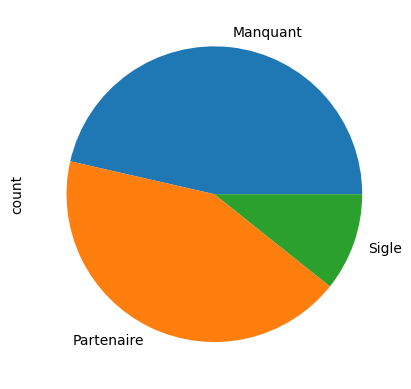

In [24]:
#Cartographie visuelle
import matplotlib.pyplot as plt
import numpy as np

df['alt_type'] = np.where(df['alt'].isna(), 'Manquant',
                 np.where(df['alt'].str.contains('_'), 'Sigle', 
                 'Partenaire'))

df['alt_type'].value_counts().plot.pie()
plt.show()